# Sequential Testing

Sequential likelihood ratio test (SLRT) for two continuous-time stochastic processes generated by diffusions.

Example: 
$$dY_t = f(t)dt + dW_t$$
with simple v.s. simple hypothesis
$$\begin{cases}H_0:f\equiv 0\\ H_1:f\equiv a\end{cases}.$$

Likelihood ratio:
$$L_t = e^{\int_0^t a\,dY_s - \frac{1}{2}\int_0^t a^2\,ds} = e^{a(Y_t - Y_0) - \frac{1}{2}a^2t}$$
For fixed time $t$, reject $H_0$ if $L_t$ is large enough.

In sequential testing, one can dynamically decide if to end the test (reject/not reject) or to collect more information. The test ends at a stopping time $T$, which is the first time $L_T$ exits the interval $(A,B)$.

After determining the type I error probability $\alpha$ and the type II error probability $\beta$, an approximation provides
$$A = \frac{\beta}{1-\alpha},B = \frac{1-\beta}{\alpha}.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A family of f functions to test

# Same as H0, should not reject
def f_H0(x):
    return 0
    
# Same as H1, should reject
def f_H1(x):
    # We take a = 1 in this example
    return 1

# Closer to H1, should reject
def f_test1(x):
    return 0.8

# Closer to H0, should not reject
def f_test2(x):
    return 0.2

# Not easily dintinguishable
def f_test3(x):
    return 0.5

In [3]:
# SDE simulation
# Since the diffusion is Markovian, input Y_t and simulate Y_{t+h}
# h is the time discretization step size, t is current time
h = 0.05
def next_sample(t,Yt,f,h):
    return Yt + f(t) * h + np.sqrt(h) * np.random.randn()

In [4]:
alpha = 0.05
beta = 0.05
A = beta/(1 - alpha)
B = (1 - beta)/alpha

In [5]:
# SLRT with continuation region (A,B)
def SLRT(f,h,A,B):
    # Init
    L = 1
    count = 0
    Y0 = 0.0
    Y_traj = [Y0]
    L_traj = [L]
    Y = Y0

    while A < L and L < B:
        # Continue the test
        t = count * h
        Y = next_sample(t,Y,f,h)
        Y_traj.append(Y)
    
        # Compute L
        L = np.exp((Y - Y0) - 0.5 * t)
        L_traj.append(L)
    
        # Next round
        count += 1
    return L, count, Y_traj, L_traj

## Testing

In [6]:
# Test for different functions of f
L, count, Y_traj, L_traj = SLRT(f_test3,h,A,B)

# Print the result
if L <= A:
    print("Not reject H0.")
elif L >= B:
    print("Reject H0.")
    
print("Total rounds: " + str(count))

Reject H0.
Total rounds: 114


Text(0.5, 1.0, 'Trajectory of Y')

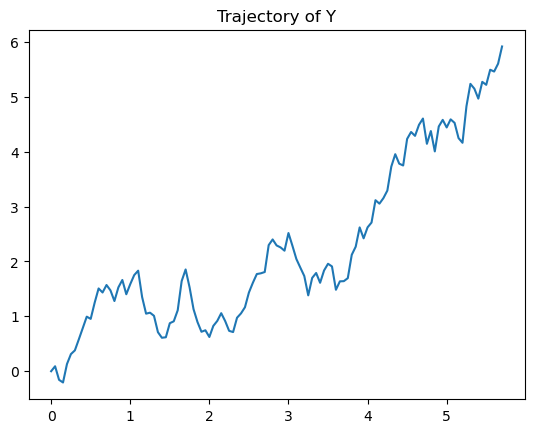

In [7]:
plt.plot(h * np.arange(len(Y_traj)),Y_traj)
plt.title("Trajectory of Y")

Text(0.5, 1.0, 'Trajectory of L')

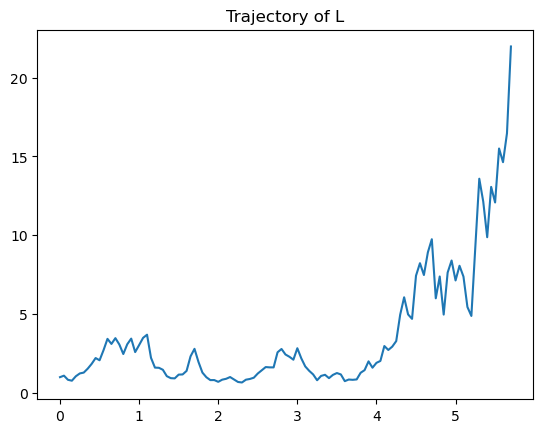

In [8]:
plt.plot(h * np.arange(len(L_traj)),L_traj)
plt.title("Trajectory of L")